In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import streamlit as st
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [116]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data['hour'] = pd.to_datetime(data['date_time']).dt.hour
data['holiday'] = data['holiday'].apply(lambda x: 0 if x == 'None' else 1)

# Features and target
X = data[['hour', 'temp', 'holiday']]
y = data['traffic_volume']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Streamlit app
st.title("Traffic Volume Predictor")
st.write("This dashboard predicts traffic volume based on time, temperature, and holiday status.")

# Inputs
hour = st.slider("Select Hour of the Day", 0, 23, step=1)
temp = st.number_input("Enter Temperature (°C)", value=20.0)
holiday = st.selectbox("Is it a Holiday?", ["No", "Yes"])
holiday = 1 if holiday == "Yes" else 0

# Prediction
if st.button("Predict Traffic Volume"):
    prediction = model.predict([[hour, temp, holiday]])
    st.success(f"Predicted Traffic Volume: {int(prediction[0])}")

# Optional Visualization
st.write("### Insights from the Dataset")
st.bar_chart(data.groupby('hour')['traffic_volume'].mean())

2024-11-23 20:50:33.476 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 20:50:33.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 20:50:33.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 20:50:33.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 20:50:33.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 20:50:33.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 20:50:33.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-23 20:50:33.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

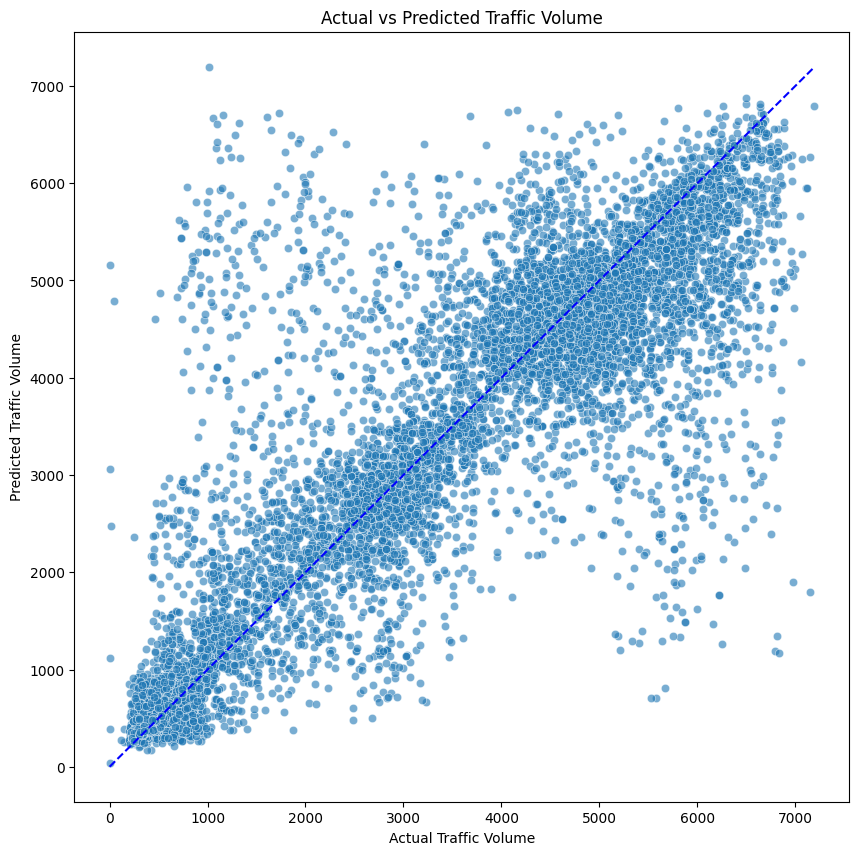

In [117]:
y_pred = model.predict(X_test)

# plt.figure(figsize=(10, 10))

# sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
# plt.xlabel('Actual Traffic Volume')
# plt.ylabel('Predicted Traffic Volume')
# plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')  # Diagonal
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.show()